## Vương Thanh Linh
## MSSV: 21521082

In [15]:
from keras.datasets import mnist
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
(train_images, train_labels), (test_images,	test_labels) = mnist.load_data()

In [17]:
print("Train images: ", train_images.shape)
print("Train labels: ", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels: ", test_labels.shape)

Train images:  (60000, 28, 28)
Train labels:  (60000,)
Test images: (10000, 28, 28)
Test labels:  (10000,)


In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt
def create_model():
  nn_model = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(128, activation='relu'),
      Dropout(0.2),
      Dense(10, activation='softmax')
  ])
  return nn_model

In [20]:
k = 10
kf = KFold(n_splits=k)
fold = 1

accuracy_per_fold = []
loss_per_fold = []
models = []

for train_index, val_index in kf.split(train_images):
    print(f"Training for fold {fold}...")
    X_train_fold, X_val_fold = train_images[train_index], train_images[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

    model = create_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model for the current fold
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Save the model
    models.append(model)

    # Evaluate the model on test data
    loss, accuracy = model.evaluate(test_images, test_labels)
    loss_per_fold.append(loss)
    accuracy_per_fold.append(accuracy)

    print(f"Loss for fold {fold}: {loss}")
    print(f"Accuracy for fold {fold}: {accuracy}")

    fold += 1

Training for fold 1...
Epoch 1/5
1688/1688 [==============================] - 10s 5ms/step - loss: 0.3024 - accuracy: 0.9139 - val_loss: 0.1443 - val_accuracy: 0.9575
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1499 - accuracy: 0.9554 - val_loss: 0.1096 - val_accuracy: 0.9665
Epoch 3/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1102 - accuracy: 0.9672 - val_loss: 0.0940 - val_accuracy: 0.9728
Epoch 4/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0881 - accuracy: 0.9726 - val_loss: 0.0838 - val_accuracy: 0.9738
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9740
Loss for fold 1: 0.08488781750202179
Accuracy for fold 1: 0.9739999771118164
Training for fold 2...
Epoch 1/5
1688/1688 [==============================] - 10s 5ms/step - loss: 0.3130 - accuracy: 0.9098 - val_loss: 0.1658 - val_accuracy: 0.9512
Epoch 2/5
1688/1688 [==============================] - 8s 5ms

Mean Accuracy: 0.9761399924755096
Standard Deviation Accuracy: 0.0011697958654771784
Mean Loss: 0.07791125923395156
Standard Deviation Loss: 0.004235964309330814


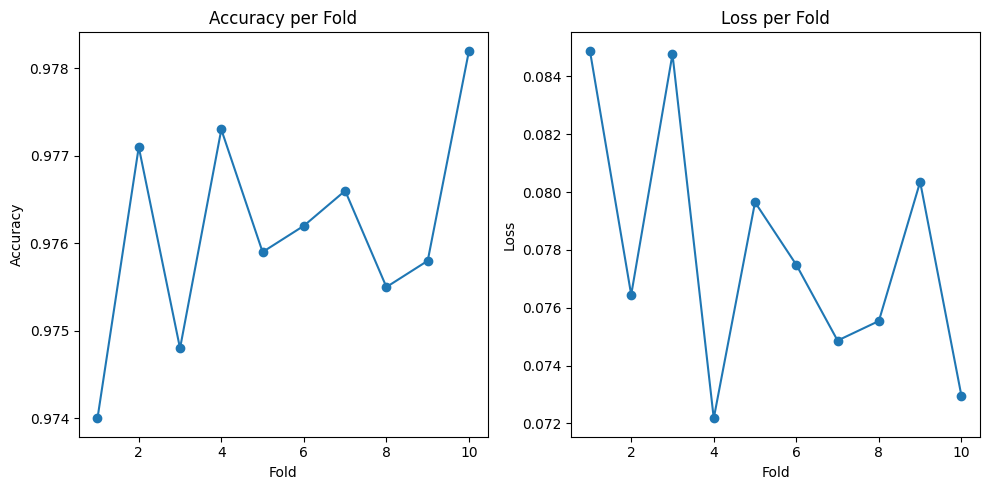

In [21]:
import numpy as np

accuracy_per_fold = np.array(accuracy_per_fold)
loss_per_fold = np.array(loss_per_fold)

mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation Accuracy:", std_accuracy)
print("Mean Loss:", mean_loss)
print("Standard Deviation Loss:", std_loss)

fold_numbers = np.arange(1, k+1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fold_numbers, accuracy_per_fold, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold')
plt.subplot(1, 2, 2)
plt.plot(fold_numbers, loss_per_fold, marker='o')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Loss per Fold')
plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 4ms/step - loss: 0.0730 - accuracy: 0.9782
Accuracy on test sample: 0.9782000184059143
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



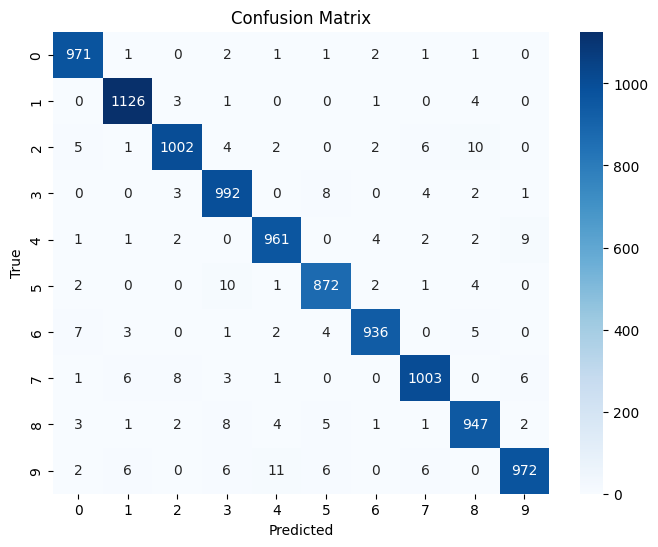

In [29]:
best_model_index = np.argmax(accuracy_per_fold)
best_model = models[best_model_index]

predict = best_model.predict(test_images)
predict_label = np.argmax(predict, axis=1)

test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print("Accuracy on test sample:", test_accuracy)

report = classification_report(test_labels, predict_label)
print("Classification Report:")
print(report)

cm = confusion_matrix(test_labels, predict_label)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 25ms/step


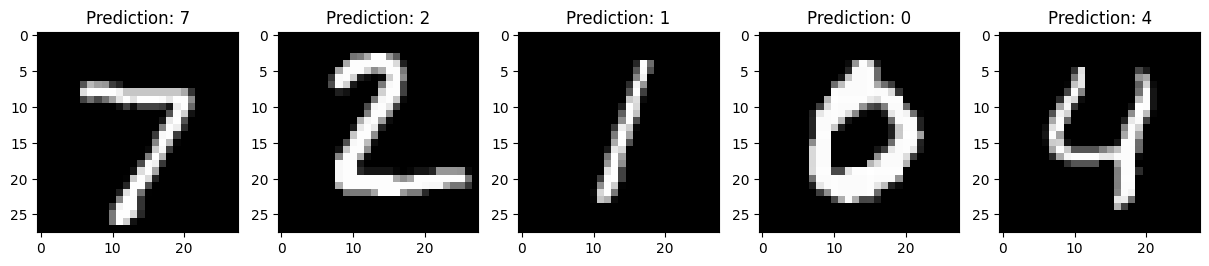

In [30]:
sample_test = test_images[:5]
test_pred = best_model.predict(sample_test)
test_pred_label = np.argmax(test_pred, axis=1)
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_test[i], cmap='gray')
    plt.title(f'Prediction: {test_pred_label[i]}')
plt.show()